In [1]:
# Initialising required libraries for data import and processing

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data into the pandas module and preparing a dataframe
filepath= 'http://bit.ly/w-data'
    
df= pd.read_csv(filepath)

print('Import successful')

Import successful


# 1] Overview of the dataset


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### There are no null values in the dataset. No data procesing required .That makes it easy for us to proceed.

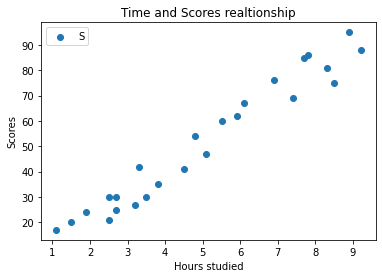

<Figure size 432x288 with 0 Axes>

In [5]:
# Using the matplotlib library to visualise and determine the realtion between variables
x= df.Hours
y=df.Scores

#using the scatterplot to plot the values
plt.scatter(x,y, marker='o')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.title('Time and Scores realtionship')
plt.legend('Scores')
plt.show()
plt.tight_layout()

- We see a linear relationship between the two parameters.

## 2] Model preparation and training 

In [6]:
# Defining the features and target for the model 
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# Using the train_test_split method to divide the model into trainiing and testing sets 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
#Using the linear regression algorithm for preparing the model
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

#fitting the data to train the model
LR.fit(X_train,y_train)

print('Training complete')

Training complete


In [8]:
#Printing the various components of the model
print('co-efficient:',LR.coef_)
print('intercept:',LR.intercept_)

co-efficient: [9.91065648]
intercept: 2.018160041434683


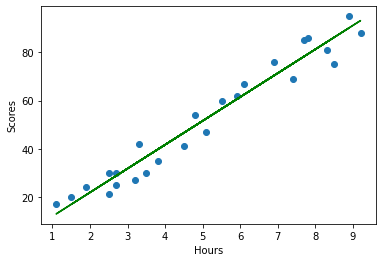

In [9]:
#Plotting the line of regression
line= LR.coef_*X+ LR.intercept_

plt.scatter(X,y)
plt.plot(x,line, color='g')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

## 3] Predictions and model validation

In [10]:
preds= LR.predict(X_test)

### Checking and comparing predictions with the actual values

In [31]:
frame= pd.DataFrame({'trials':[1,2,3,4,5],'Actual':y_test,'predictions':preds})
frame

,trials,Actual,predictions
0,1,20,16.884145
1,2,27,33.732261
2,3,69,75.357018
3,4,30,26.794801
4,5,62,60.491033


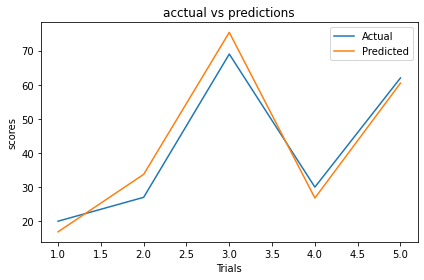

In [36]:
import matplotlib.pyplot as plt
plt.plot(frame.trials, frame['Actual'])
plt.plot(frame.trials, frame['predictions'])
plt.xlabel('Trials')
plt.ylabel('scores')
plt.title('acctual vs predictions')

plt.legend(loc='best', labels=['Actual','Predicted'])
plt.tight_layout()
plt.show()


- We can see that the predcited values do not match.So it can be concluded that th model is not 100% accurate.
- We can find out the error using the mean absolute error function from the scikit learn library.

### 4] Model Evaluation

In [12]:
from sklearn import metrics

MAE= metrics.mean_absolute_error(y_test,preds)

print('The mean absolute error for the model is: {:.4f}'.format(MAE))

The mean absolute error for the model is: 4.1839


- It is evident from the module that the model has a mean error over the actual values.

### 4] Final Prediction


In [13]:
#predicting the score for the given study hours
hours=9.25
prediction= LR.predict([[hours]])
print('Hours studied: {}'.format(hours))
print('Percentage scored: {:.3f}'.format(prediction[0]))

Hours studied: 9.25
Percentage scored: 93.692


#### We can conclude that the student studying for given hours of time and considering the mean absolute error  will score 93.7 percentage.